In [8]:
import six
import sys

sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import time
import os

In [9]:
# Constants
# Dictionaries
RHC_KEY = 'rhc'
SA_KEY = 'sa'
GA_KEY = 'ga'
MIMIC_KEY = 'mimic'

# Algorithm Names
RHC_ALGORITHM = 'Random Hill Climb'
SA_ALGORITHM = 'Simulated Annealing'
GA_ALGORITHM = 'Genetic Algormithm'
MIMIC_ALGORITHM = 'MIMIC'

# Different charts
FITNESS_PLOT = 0
TIME_PLOT = 1

# Chart axes
ITERATIONS_AXIS = 'Iterations'
TIME_AXIS = 'Time'
FITNESS_AXIS = 'Fitness'
ALGORITHM_AXIS = 'Algorithm'

# Tuning
MAX_ITEMS = 50
MAX_WEIGHTS = 40
MAX_VALUES = 5
NUM_OF_EACH = 30
RANDOM_SEED = 10
MAX_WEIGHT_PCT = 0.6
MAX_VAL = 3
SA = 0.9
RESTARTS = 500
MAX_ATTEMPTS = 200
MAX_ITERS = 5000
AVG_ITERS = 10
POPULATION_SIZE = 100
MUTATION_PROB = 0.1
KEEP_PCT = 0.2

# Stuff the record the algorithm times
RHC_TIME = 0
SA_TIME = 1
GA_TIME = 2
MIMIC_TIME = 3
times = []

evaluation = []

In [10]:
# ## Build Knapsack
#
# types_of_items = 35
# maximum_items = 20
#
# # Weights of each of the possible items to add
# weights = np.random.randint(1, MAX_WEIGHTS, size=NUM_OF_EACH)
# # Values of each of the possible items to add
# values = np.random.randint(1, MAX_VALUES, size=NUM_OF_EACH)
# # MAX_WEIGHT_PCT is the percentage of knapack weight used for each item type
# fitness = mlrose.Knapsack(weights.tolist(), values.tolist(), MAX_WEIGHT_PCT)
# print(fitness.values)
# print(fitness.weights)
# print(fitness.get_prob_type())


In [11]:
# length is number of elements in the state vector (int)
# fitness function is the value returned by mlrose.knapsack
# Is this a maximize or minimize problem
# max_cal = max value of each element in state vector - i.e. max number of each item type
# prob = mlrose.DiscreteOpt(length=NUM_OF_EACH,
#                           fitness_fn=fitness,
#                           maximize=True,
#                           max_val=MAX_VAL)
# # initial_state = np.random.randint(MAX_VAL+1, size=NUM_OF_EACH)
# initial_state = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#                  0, 0, 0, 0, 0, 0]
#
# rnd_initial_state = np.array(initial_state)

In [12]:
probs = []

In [13]:
## Build Travelling Sales Person

np.random.seed(42)
coords = []
prob_len = 100

coords = [np.random.rand(2) for n in range(prob_len)]

## Create the TSP problem
fitness = mlrose.TravellingSales(coords=coords)
tsp_prob = mlrose.TSPOpt(prob_len, fitness)

probs.append(tsp_prob)


In [14]:
## Build Flip Flop

np.random.seed(42)
prob_len = 50


## Create the TSP problem
fitness = mlrose.FlipFlop()
ff_prob = mlrose.DiscreteOpt(prob_len, fitness)

probs.append(ff_prob)

In [15]:
## Build Continuous Peaks

np.random.seed(43)
prob_len = 20


## Create the TSP problem
fitness = mlrose.ContinuousPeaks()
cp_prob = mlrose.DiscreteOpt(prob_len, fitness)

probs.append(cp_prob)

Running TSP SA with decay 0.999
Running TSP SA with decay 0.99
Running TSP SA with decay 0.9
Running TSP SA with decay 0.7
Running TSP SA with decay 0.5
Running TSP SA with decay 0.3
decays = [0.999, 0.99, 0.9, 0.7, 0.5, 0.3]
Plotting SA Curve
/home/poblivsig/Dropbox/Random-Optimization
SA best_state = [65  7 54 72 90 83 74 49 28 41 18  2 62 84 21 36 50 29 64 66 55 39 94  9
 71 61 93 47 48 42 11 30 97 32 20 76 13 80 40 46 59 31 44 63 27 98 57 68
 51 23  8 19 85 38 14 10 73 96 17 25 56 99 70 75 35 88 87 15 24 86 92 45
  0 69 60 91 26 43 67  6 81 53 12 82  5 34 16 95 33 79  3 22 58 89 77 52
  1  4 37 78]
SA best_fit = 19.57706759588406
Timing SA Start
Timing SA Stop
Running TSP GA with population 25
Running TSP GA with population 50
Running TSP GA with population 100


/home/poblivsig/.local/lib/python3.8/site-packages/mlrose/algorithms.py:311: RuntimeWarning: overflow encountered in exp
  prob = np.exp(delta_e/temp)


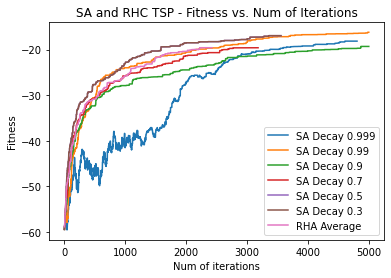

In [ ]:
for prob, prob_name in zip (probs, ['TSP', 'FF', 'CP']):

    ## Run the problem through the Simulated Annealing

    # MAX_ITERS = 1500
    # MAX_ATTEMPTS = 100
    RANDOM_SEED = 42

    decays = [0.999, 0.99, 0.9, 0.7, 0.5, 0.3]

    curves = []
    for decay in decays:
        print(f'Running {prob_name} SA with decay {decay}')

        schedule = mlrose.GeomDecay(decay=decay)
        best_state, \
        best_fit, \
        curve = mlrose.simulated_annealing(prob,
                                           schedule=schedule,
                                           max_attempts=MAX_ATTEMPTS,
                                           curve=True,
                                           random_state=RANDOM_SEED,
                                           max_iters=MAX_ITERS)
        # Add the curve to the curve list
        curves.append(curve)

    ## Run for Random Hill Climb to compare with SA
    best_state, \
    best_fit, \
    curve = mlrose.random_hill_climb(prob,
                                     # schedule=schedule,
                                     max_attempts=MAX_ATTEMPTS,
                                     curve=True,
                                     random_state=RANDOM_SEED,
                                     max_iters=MAX_ITERS)
    # Add the curve to the curve list
    curves.append(curve)

    # Create the fitness curve
    df = pd.DataFrame(curves).transpose()

    # def add_sa(n):
    #     return prob_name + ' ' + n
    # decays = list(map(add_sa, str(decays)))

    print(f'decays = {decays}')

    # decays.append('RHC Average')
    df.columns = ['SA Decay 0.999',
                  'SA Decay 0.99',
                  'SA Decay 0.9',
                  'SA Decay 0.7',
                  'SA Decay 0.5',
                  'SA Decay 0.3',
                  'RHA Average']

    print('Plotting SA Curve')
    df.plot()

    plt.title('SA and RHC TSP - Fitness vs. Num of Iterations')
    plt.xlabel('Num of iterations')
    plt.ylabel('Fitness')
    print(os.getcwd())
    plt.savefig(f'{os.getcwd()}\\data\\{prob_name}_SA_Fitness.png')
    plt.show()

    print(f'SA best_state = {best_state}')
    print(f'SA best_fit = {best_fit}')

    ## Now time SA

    # Start Timer
    tic = time.perf_counter()

    print('Timing SA Start')
    schedule = mlrose.GeomDecay(decay=0.99)
    best_state, \
    best_fit, \
    curve = mlrose.simulated_annealing(prob,
                                       schedule=schedule,
                                       max_attempts=MAX_ATTEMPTS,
                                       curve=True,
                                       random_state=RANDOM_SEED,
                                       max_iters=MAX_ITERS)
    # Stop timer
    toc = time.perf_counter()
    print('Timing SA Stop')

    # Add the time to the times curve
    total_time = toc - tic
    times.append(total_time / len(curve))
    curves.append(curve)
    evaluation.append(np.argmax(curve) + 1)

    ## Run the problem through the Genetic Algorithm for population

    # MAX_ITERS = 5000
    # MAX_ATTEMPTS = 200
    RANDOM_SEED = 41

    mutation_rate = [0.005, 0.05, 0.1, 0.5, 1]
    crossover_rate = [10, 25, 50, 75, 100]
    populations = [25, 50, 100, 200, 300]

    top_fitness = 0

    curves = []
    for population in populations:
        print(f'Running {prob_name} GA with population {population}')

        best_state, \
        best_fit, \
        curve = mlrose.genetic_alg(prob,
                                   max_attempts=MAX_ATTEMPTS,
                                   curve=True,
                                   random_state=RANDOM_SEED,
                                   max_iters=MAX_ITERS,
                                   pop_size = population)
        # Add the curve to the curve list
        curves.append(curve)

        ## If this is the best fitness, store the details
        if best_fit > top_fitness:
            ga_top_fitness = best_fit
            ga_top_state = best_state
            ga_top_pop = population

    # Create the fitness curve
    df = pd.DataFrame(curves).transpose()
    df.columns = populations
    print('Plotting GA Curve')
    df.plot()

    plt.title(f'GA {prob_name} Population- Fitness vs. Num of Iterations')
    plt.xlabel('Num of iterations')
    plt.ylabel('Fitness')
    print(os.getcwd())
    plt.savefig(f'{os.getcwd()}\\{prob_name}_GA_Pop_Fitness.png')
    plt.show()

    print(f'ga_top_fitness = {ga_top_fitness}')
    print(f'ga_top_state = {ga_top_state}')
    print(f'ga_top_population = {ga_top_pop}')
    ## Run the problem through the Genetic Algorithm for mutation rate

    # MAX_ITERS = 5000
    # MAX_ATTEMPTS = 200
    RANDOM_SEED = 41

    mutation_rates = [0.005, 0.05, 0.1, 0.5, 1]
    populations = [25, 50, 100, 200, 300, 400]

    top_fitness = 0

    curves = []
    for mutation_rate in mutation_rates:
        print(f'Run {prob_name} GA with mutation probability {mutation_rate}')

        best_state, \
        best_fit, \
        curve = mlrose.genetic_alg(prob,
                                   max_attempts=MAX_ATTEMPTS,
                                   curve=True,
                                   random_state=RANDOM_SEED,
                                   max_iters=MAX_ITERS,
                                   mutation_prob = mutation_rate)
        # Add the curve to the curve list
        curves.append(curve)

        ## If this is the best fitness, store the details
        if best_fit > top_fitness:
            ga_top_fitness = best_fit
            ga_top_state = best_state
            ga_top_mutation = mutation_rate

    # Create the fitness curve
    df = pd.DataFrame(curves).transpose()
    df.columns = mutation_rates
    print('Plotting GA Curve')
    df.plot()

    plt.title(f'GA {prob_name} Mutation Rate - Fitness vs. Num of Iterations')
    plt.xlabel('Num of iterations')
    plt.ylabel('Fitness')
    print(os.getcwd())
    plt.savefig(f'{os.getcwd()}\\{prob_name}_GA_Mut_Fitness.png')
    plt.show()

    print(f'ga_top_fitness = {ga_top_fitness}')
    print(f'ga_top_state = {ga_top_state}')
    print(f'ga_top_mutation = {ga_top_mutation}')
    ## Now time GA

    # Start Timer
    tic = time.perf_counter()

    print('Timing GA Start')
    best_state, \
    best_fit, \
    curve = mlrose.genetic_alg(prob,
                               # schedule=schedule,
                               max_attempts=MAX_ATTEMPTS,
                               curve=True,
                               random_state=RANDOM_SEED,
                               max_iters=MAX_ITERS)
    # Stop timer
    toc = time.perf_counter()
    print('Timing GA Stop')

    # Add the time to the times curve
    total_time = toc - tic
    times.append(total_time / len(curve))
    curves.append(curve)
    evaluation.append(np.argmax(curve) + 1)

    ## Run the problem through MIMIC for population

    # MAX_ITERS = 5000
    # MAX_ATTEMPTS = 200
    RANDOM_SEED = 41

    populations = [25, 50, 100, 200, 300]

    top_fitness = 0

    curves = []
    for population in populations:
        print(f'Running {prob_name} MIMIC with population {population}')

        best_state, \
        best_fit, \
        curve = mlrose.mimic(prob,
                             max_attempts=MAX_ATTEMPTS,
                             curve=True,
                             random_state=RANDOM_SEED,
                             max_iters=MAX_ITERS,
                             pop_size = population)
        # Add the curve to the curve list
        curves.append(curve)

        ## If this is the best fitness, store the details
        if best_fit > top_fitness:
            mi_top_fitness = best_fit
            mi_top_state = best_state
            mi_top_pop = population

    # Create the fitness curve
    df = pd.DataFrame(curves).transpose()
    df.columns = populations
    print('Plotting MIMIC Curve')
    df.plot()

    plt.title(f'MIMIC {prob_name} Population- Fitness vs. Num of Iterations')
    plt.xlabel('Num of iterations')
    plt.ylabel('Fitness')
    print(os.getcwd())
    plt.savefig(f'{os.getcwd()}\\{prob_name}_MIMIC_Pop_Fitness.png')
    plt.show()

    print(f'mi_top_fitness = {mi_top_fitness}')
    print(f'mi_top_state = {mi_top_state}')
    print(f'mi_top_population = {mi_top_pop}')

    ## Run the problem through MIMIC for keep percentage

    # MAX_ITERS = 5000
    # MAX_ATTEMPTS = 200
    RANDOM_SEED = 41

    keep_pcts = [0.05, 0.1, 0.5, 1]

    top_fitness = 0

    curves = []
    for keep_pct in keep_pcts:
        print(f'Running {prob_name} MIMIC with keep_pct {keep_pct}')

        best_state, \
        best_fit, \
        curve = mlrose.mimic(prob,
                             max_attempts=MAX_ATTEMPTS,
                             curve=True,
                             random_state=RANDOM_SEED,
                             max_iters=MAX_ITERS,
                             keep_pct=keep_pct)
        # Add the curve to the curve list
        curves.append(curve)

        ## If this is the best fitness, store the details
        if best_fit > top_fitness:
            mi_top_fitness = best_fit
            mi_top_state = best_state
            mi_top_keep = keep_pct

    # Create the fitness curve
    df = pd.DataFrame(curves).transpose()
    df.columns = keep_pcts
    print('Plotting MIMIC Curve for Keep')
    df.plot()

    plt.title(f'MIMIC {prob_name} Keep % - Fitness vs. Num of Iterations')
    plt.xlabel('Num of iterations')
    plt.ylabel('Fitness')
    print(os.getcwd())
    plt.savefig(f'{os.getcwd()}\\{prob_name}_MIMIC_keep_Fitness.png')
    plt.show()

    print(f'mi_top_fitness = {mi_top_fitness}')
    print(f'mi_top_state = {mi_top_state}')
    print(f'mi_top_keep = {mi_top_keep}')

    ## Now time MIMIC

    # Start Timer
    tic = time.perf_counter()

    print('Timing MIMIC Start')
    best_state, \
    best_fit, \
    curve = mlrose.mimic(prob,
                         # schedule=schedule,
                         max_attempts=MAX_ATTEMPTS,
                         curve=True,
                         random_state=RANDOM_SEED,
                         max_iters=MAX_ITERS)
    # Stop timer
    toc = time.perf_counter()
    print('Timing MIMIC Stop')

    # Add the time to the times curve
    total_time = toc - tic
    times.append(total_time / len(curve))
    curves.append(curve)

    ## Add to eval to compare each
    evaluation.append(np.argmax(curve) + 1)

    # Output all the information found
    print(f'Maxima = {df.max()}')
    print(f'Time for one iteration = {times}')
    print(f'Function evals at maxima = {evaluation}')

